In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf

names = [
    "Alina Blomgren","Sonja Blomgren","Agda Carlsen","Elsa Carlsen","Leif Carlsen","Tobias Carlsen",
    "Balan Dayal","Julian Eklund","Anika Jensen","Magnar Jensen","Vanessa Jensen",
    "Kahaan Kapoor","Inken Maurer","Jacob Moore","Tomas Pallesen","Lila Price",
    "Auna Sato","Kaya Solberg","Karena Sorensen","Lea Sorensen","Devak Srinivasan",
    "Soren Svendsen","Suhanisa Varadhan","Minh Yamada"
]

city = [
    "Shinobi","Bjurholm","Bjurholm","Bjurholm","Bjurholm","Vardo","Eden","Eden","Hofn","Bjurholm","Bjurholm",
    "Bjurholm","Vardo","Bjurholm","Bjurholm","Bjurholm","Akkeshi","Vardo","Hofn","Vardo","Bjurholm","Vardo",
    "Bjurholm","Shinobi"
]

age = [86,44,77,33,55,30,77,42,49,89,88,67,44,67,88,34,26,53,46,46,70,50,54,44]
sex = ["F","F","F","F","M","M","M","M","F","M","F","M","F","M","M","F","M","F","F","F","M","M","F","M"]

rest = [77,75,58,71,63,83,62,74,57,75,66,79,79,53,76,72,94,92,70,79,75,55,65,78]
after = [75,76,58,71,62,84,61,74,58,75,65,80,82,55,77,70,93,93,71,75,77,54,65,78]

data = pd.DataFrame({
    "Name": names,
    "City": city,
    "Age": age,
    "Sex": sex,
    "Heart_rate_at_rest": rest,
    "Heart_rate_after": after
})
display(data.head())

,Name,City,Age,Sex,Heart_rate_at_rest,Heart_rate_after
0,Alina Blomgren,Shinobi,86,F,77,75
1,Sonja Blomgren,Bjurholm,44,F,75,76
2,Agda Carlsen,Bjurholm,77,F,58,58
3,Elsa Carlsen,Bjurholm,33,F,71,71
4,Leif Carlsen,Bjurholm,55,M,63,62


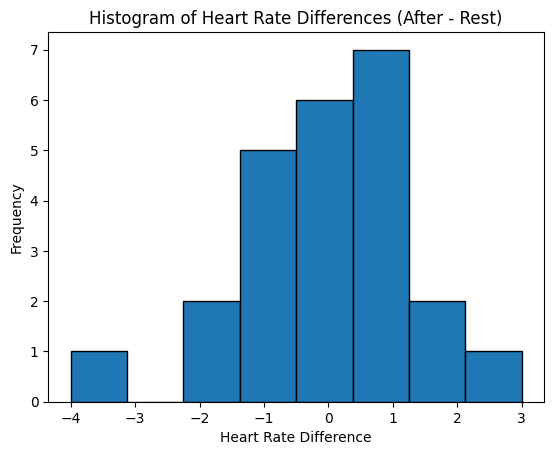

Paired t-test: 0.13452132697638325 0.8941606031219365


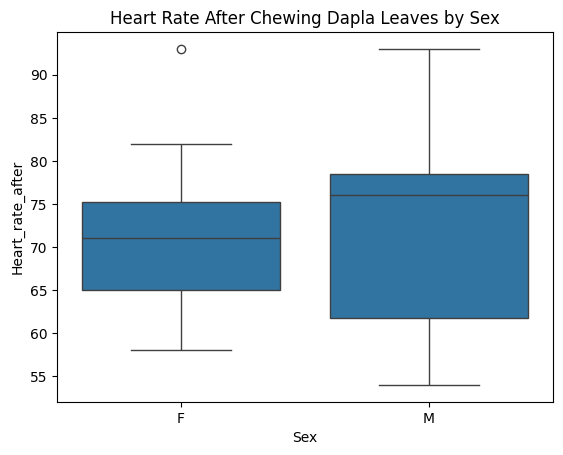

In [8]:
data["diff"] = data["Heart_rate_after"] - data["Heart_rate_at_rest"]
plt.hist(data["diff"], bins=8, edgecolor="black")
plt.title("Histogram of Heart Rate Differences (After - Rest)")
plt.xlabel("Heart Rate Difference")
plt.ylabel("Frequency")
plt.show()

t_stat, p_val = stats.ttest_rel(data["Heart_rate_after"], data["Heart_rate_at_rest"])
print("Paired t-test:", t_stat, p_val)

sns.boxplot(x="Sex", y="Heart_rate_after", data=data)
plt.title("Heart Rate After Chewing Dapla Leaves by Sex")
plt.show()


In [9]:
male_after = data.loc[data["Sex"]=="M","Heart_rate_after"]
female_after = data.loc[data["Sex"]=="F","Heart_rate_after"]
levene_stat, levene_p = stats.levene(male_after, female_after)
print("Variance test (Levene):", levene_stat, levene_p)

t_stat, p_val = stats.ttest_ind(male_after, female_after, equal_var=False)
print("Two-sample t-test (unequal variances):", t_stat, p_val)

z_score = (812 - 800) / (25/np.sqrt(16))
p_value = 2*(1 - stats.norm.cdf(abs(z_score)))
ci_low = 812 - 1.96*(25/4)
ci_up = 812 + 1.96*(25/4)
print("Z-score:", z_score, "p-value:", p_value, "95% CI:", (ci_low, ci_up))

flow125 = np.array([2.7,4.6,2.6,3.0,3.2,3.8])
flow200 = np.array([4.6,3.4,2.9,3.5,4.1,5.1])
t_stat, p_val = stats.ttest_ind(flow125, flow200, equal_var=True)
print("Flow t-test:", t_stat, p_val)
print("Var test:", stats.levene(flow125, flow200))

Variance test (Levene): 0.3958772705626234 0.5357055925898622
Two-sample t-test (unequal variances): 0.20466625747124526 0.8397839103608713
Z-score: 1.92 p-value: 0.054857899407673605 95% CI: (799.75, 824.25)
Flow t-test: -1.349789758764916 0.20684427155818644
Var test: LeveneResult(statistic=np.float64(0.18831667947732497), pvalue=np.float64(0.6735343609321034))


/var/folders/t0/cl4mx7656030fy5dm2t2jwsr0000gn/T/ipykernel_29235/893216295.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([flow125, flow200], labels=["flow125","flow200"])


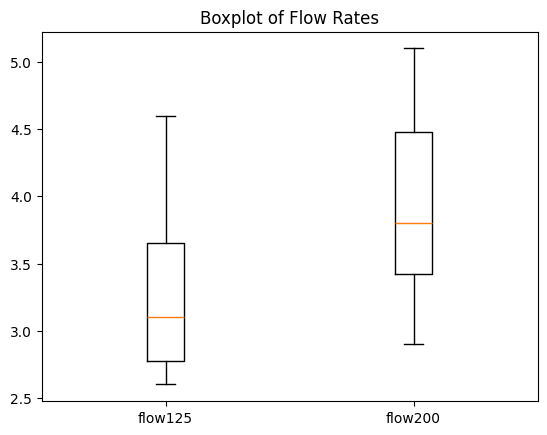

ANOVA F: 33.09487749959792 p: 1.1847789416208343e-09


In [10]:
plt.boxplot([flow125, flow200], labels=["flow125","flow200"])
plt.title("Boxplot of Flow Rates")
plt.show()

df = 4
SSB = 1174.24 - 186.53
MS = SSB/df
MSE = 186.53/25
f = MS/MSE
p = 1 - stats.f.cdf(f, 4, 25)
print("ANOVA F:", f, "p:", p)

In [16]:
question5 = pd.read_csv("HW1_Q5_Data_S2025.csv")
question5 = question5.rename(columns={
    "Orifice.Diameter": "Orifice_Diameter",
    "Radon.Released": "Radon_Released"
})

In [17]:
question5.head()

,Orifice_Diameter,Radon_Released
0,0.37,80
1,0.37,83
2,0.37,83
3,0.37,85
4,0.51,75


In [20]:
model = smf.ols("Radon_Released ~ C(Orifice_Diameter)", data=question5).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                       sum_sq    df          F        PR(>F)
C(Orifice_Diameter)  1133.375   5.0  30.851796  3.159515e-08
Residual              132.250  18.0        NaN           NaN


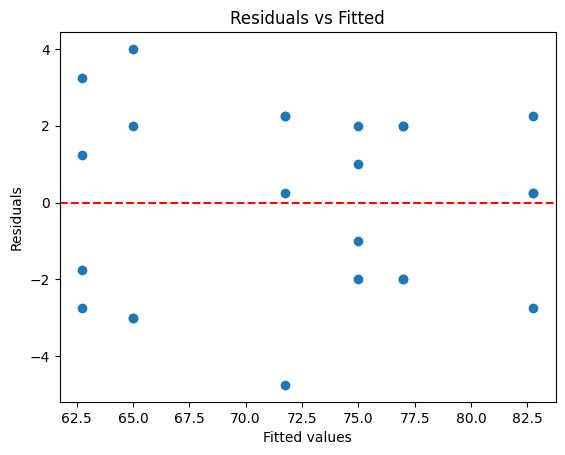

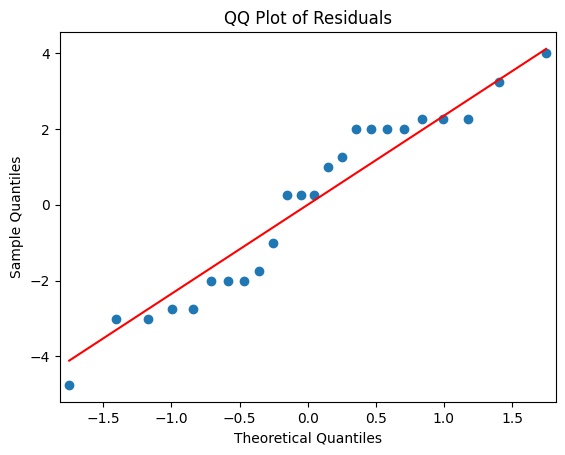

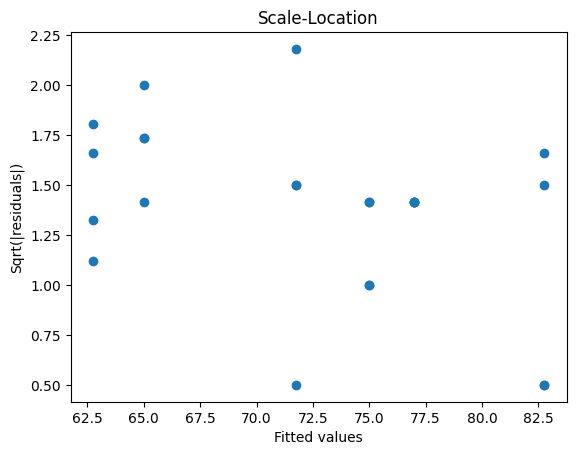

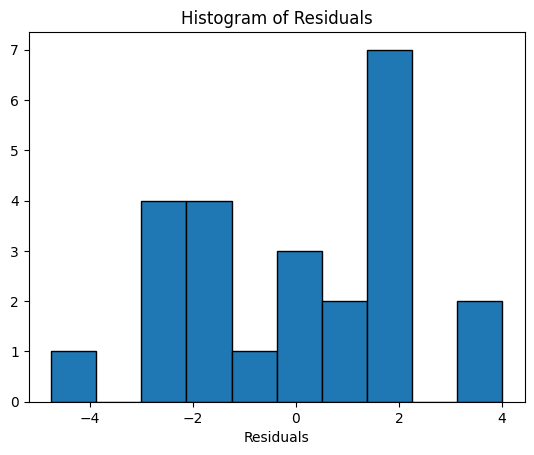

In [27]:
# Residuals vs fitted
plt.scatter(model.fittedvalues, model.resid)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()

# QQ plot of residuals
sm.qqplot(model.resid, line="s")
plt.title("QQ Plot of Residuals")
plt.show()

# Scale-location plot (sqrt of |residuals| vs fitted)
plt.scatter(model.fittedvalues, np.sqrt(np.abs(model.resid)))
plt.xlabel("Fitted values")
plt.ylabel("Sqrt(|residuals|)")
plt.title("Scale-Location")
plt.show()

# Histogram of residuals
plt.hist(model.resid, bins=10, edgecolor="black")
plt.xlabel("Residuals")
plt.title("Histogram of Residuals")
plt.show()